# **Import of the important libraries**

In [ ]:
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import pandas as pd # Библиотека Pandas для работы с табличными данными
import sklearn.datasets as ds # модуль библиотеки scikit-learn про игрушечные данные
from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn import preprocessing as prep # модуль предварительной обработки данных от scikit-learn

In [ ]:
plt.style.use('dark_background') # для модных черных рисунков

# **OpenML**

используем функцию fetch_openml для загрузки данных с сайта [OpenML](https://www.openml.org/search?type=data) по имени набора данных

In [ ]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# для этого нам необходимо знать имя набора данных и версию
data  = fetch_openml('credit-g', version=1, return_X_y=False) # загружаем данные в виде словаря
# альтернативно можно было прописать  что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y = True)
data.keys() # смотрим на ключи в словаре

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
data.details # можно прочитать описание, ссылки и вот это всё

{'id': '31',
 'name': 'credit-g',
 'version': '1',
 'description_version': '10',
 'format': 'ARFF',
 'creator': 'Dr. Hans Hofmann',
 'collection_date': '1994-11-17',
 'upload_date': '2014-04-06T23:21:47',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/31/credit-g.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset31/dataset_31.pq',
 'file_id': '31',
 'default_target_attribute': 'class',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['credit_scoring',
  'finance_problem',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_14',
  'study_144',
  'study_15',
  'study_20',
  'study_218',
  'study_241',
  'study_34',
  'study_37',
  'study_41',
  'study_50',
  'study_52',
  'study_7',
  'study_70',
  'study_98',
  'study_99',
  'uci'],
 'visibility': 'public',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [ ]:
DF_OML = pd.DataFrame(data.data, columns=data.feature_names) # взяли из словаря по ключевым словам data и feature_names
DF_OML['Target'] = data.target # добавляем колонку Target на основе целевых меток
DF_OML

checking_status  duration                  credit_history  \
0                <0       6.0  critical/other existing credit   
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1<=X<4   
2              education         2096.0              <100      4<=X<7   
3    furniture/equipment         7882.0              <100      4<=X<7   
4                new car         4870.0              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment         1736.0              <100      4<=X<7   
996             used car         3857.0              <100      1<=X<4   
997             radio/tv          804.0              <100         >=7   
998             radio/tv         1845.0              <100      1<=X<4   
999             used car         4576.0        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
0                       4.0         male single          none  ...   
1                       2.0  female div/dep/mar          none  ...   
2                       2.0         male single          none  ...   
3                       2.0         male single     guarantor  ...   
4                       3.0         male single          none  ...   
..                      ...                 ...           ...  ...   
995                     3.0  female div/dep/mar          none  ...   
996                     4.0        male div/sep          none  ...   
997                     4.0         male single          none  ...   
998                     4.0         male single          none  ...   
999                     3.0         male single          none  ...   

     property_magnitude   age  other_payment_plans   housing existing_credits  \
0           real estate  67.0                 none       own              2.0   
1           real estate  22.0                 none       own              1.0   
2           real estate  49.0                 none       own              1.0   
3        life insurance  45.0                 none  for free              1.0   
4     no known property  53.0                 none  for free              2.0   
..                  ...   ...                  ...       ...              ...   
995         real estate  31.0                 none       own              1.0   
996      life insurance  40.0                 none       own              1.0   
997                 car  38.0                 none       own              1.0   
998   no known property  23.0                 none  for free              1.0   
999                 car  27.0                 none       own              1.0   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled            1.0            yes            yes   
1                      skilled            1.0           none            yes   
2           unskilled resident            2.0           none            yes   
3                      skilled            2.0           none            yes   
4                      skilled            2.0           none            yes   
..                         ...            ...            .

# Числовые данные

## Пример предварительной обработки данных

Ниже **мы** будем нормализовать не все признаки, а только те, которые не являются категориальными.

В частности **'duration'**, **'credit_amount'** and **'age'**

Визуализируем

In [ ]:
DF_OML.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

## Здесь мы просто занимаемся стандартизацией

Делаем в два шага


### **Первый шаг**
создаем объект `StandardScaler()` и "обучаем" его `.fit`

Где мы сохраняем среднее значение (`mean_`) и стандартное отклонение (`scale_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
Standard = prep.StandardScaler()

Standard.fit(DF_OML[['age','duration','credit_amount']])

StandardScaler()

Можно посмотреть на среднее и ско

In [ ]:
Standard.mean_, Standard.scale_

(array([  35.546,   20.903, 3271.258]),
 array([  11.36977942,   12.05278354, 2821.3251545 ]))

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
scaled = Standard.transform(DF_OML[['age','duration','credit_amount']])
df_standard = pd.DataFrame(scaled, columns= ['age','duration','credit_amount'])
df_standard

age  duration  credit_amount
0    2.766456 -1.236478      -0.745131
1   -1.191404  2.248194       0.949817
2    1.183312 -0.738668      -0.416562
3    0.831502  1.750384       1.634247
4    1.535122  0.256953       0.566664
..        ...       ...            ...
995 -0.399832 -0.738668      -0.544162
996  0.391740  0.754763       0.207612
997  0.215835 -0.738668      -0.874503
998 -1.103451  1.999289      -0.505528
999 -0.751642  1.999289       0.462457

[1000 rows x 3 columns]

Визуализируем

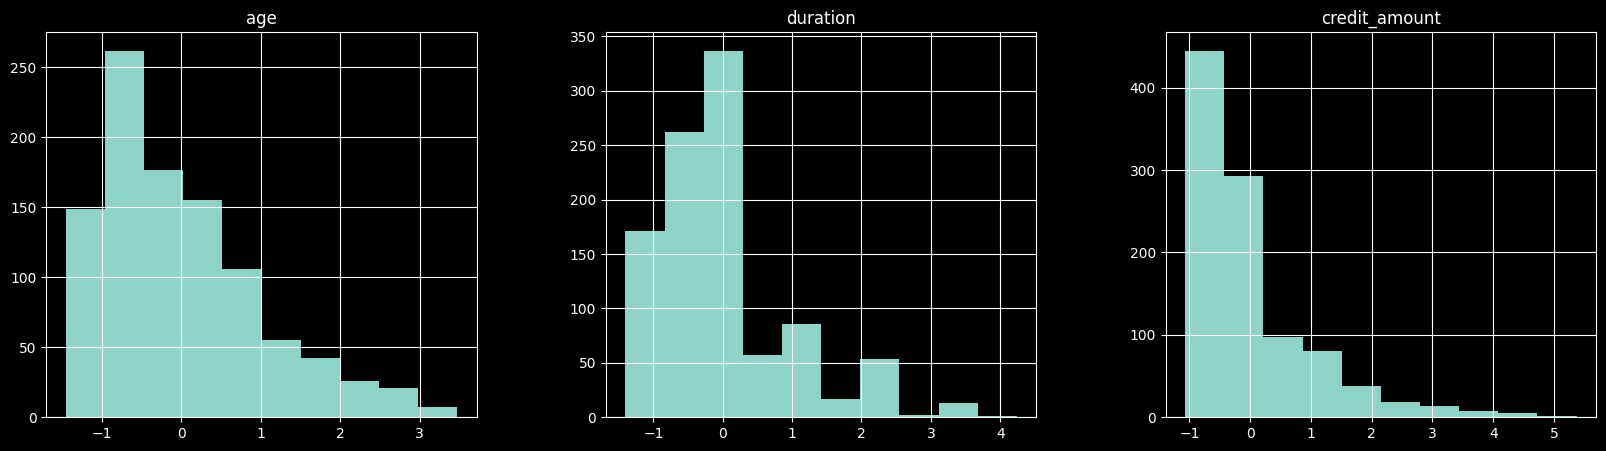

In [ ]:
DF_OML_2 = DF_OML.copy()

DF_OML_2[['age','duration','credit_amount']] = df_standard

DF_OML_2.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

## Здесь мы делаем степенное преобразование


Снова в два шага

### **Первый шаг**


Создание Объекта `PowerTransformer()` и его "обучение" `.fit`



In [ ]:
PT = prep.PowerTransformer()
PT.fit(DF_OML[['age','duration','credit_amount']])

PowerTransformer()

Коэффициенты степени (на будущее)

In [ ]:
PT.lambdas_

array([-0.70260982,  0.04045942, -0.06457869])

### **Шаг второй**
*Применение* преобразования `.transform`

In [ ]:
pt = PT.transform(DF_OML[['age','duration','credit_amount']])
df_pt = pd.DataFrame(pt, columns= ['age','duration','credit_amount'])
df_pt

age  duration  credit_amount
0    1.966313 -1.797419      -0.932701
1   -1.607482  1.764587       1.156805
2    1.211497 -0.694530      -0.157831
3    0.977107  1.516606       1.496009
4    1.415985  0.500910       0.911056
..        ...       ...            ...
995 -0.219267 -0.694530      -0.404766
996  0.630240  0.901118       0.621156
997  0.470521 -0.694530      -1.444820
998 -1.409987  1.644479      -0.324644
999 -0.742123  1.644479       0.834074

[1000 rows x 3 columns]

Визуализируем

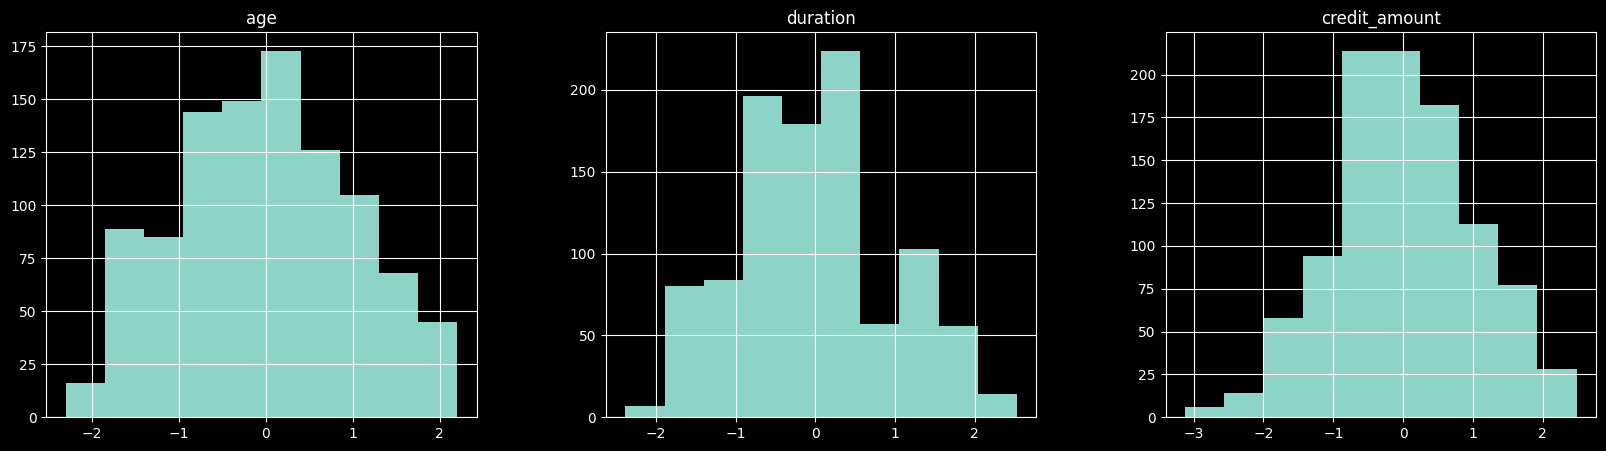

In [ ]:
DF_OML_3 = DF_OML.copy()

DF_OML_3[['age','duration','credit_amount']] = df_pt

DF_OML_3.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

## Как-бы анализ

Теперь мы можем сравнить средние значения для разных классов.

Для каждого из типов предварительной обработки

In [ ]:
DF_OML[['age','duration','credit_amount','Target']].groupby('Target').mean()

age   duration  credit_amount
Target                                     
bad     33.963333  24.860000    3938.126667
good    36.224286  19.207143    2985.457143

In [ ]:
DF_OML_2[['age','duration','credit_amount','Target']].groupby('Target').mean()

age  duration  credit_amount
Target                                   
bad    -0.139199  0.328306       0.236367
good    0.059657 -0.140703      -0.101300

In [ ]:
DF_OML_3[['age','duration','credit_amount','Target']].groupby('Target').mean()

age  duration  credit_amount
Target                                   
bad    -0.166020  0.329299       0.162087
good    0.071151 -0.141128      -0.069466

Тренды сохранились и это главное

# Категориальные данные

In [ ]:
DF_OML.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
Target                      2
dtype: int64

## Ordinal encoding



Давайте поместим некоторые бинарные категориальные признаки в порядковое кодирование.

Выбирем соответсвющие признаки

In [ ]:
DF_OML[['own_telephone','foreign_worker']]

own_telephone foreign_worker
0             yes            yes
1            none            yes
2            none            yes
3            none            yes
4            none            yes
..            ...            ...
995          none            yes
996           yes            yes
997          none            yes
998           yes            yes
999          none            yes

[1000 rows x 2 columns]

Ну вы поняли

### **Первый шаг**

Создаем объект и обучаем

In [ ]:
Ordinal = prep.OrdinalEncoder()
Ordinal.fit(DF_OML[['own_telephone','foreign_worker']])

OrdinalEncoder()

Можно посмотреть на какие категории что значат

In [ ]:
Ordinal.categories_

[array(['none', 'yes'], dtype=object), array(['no', 'yes'], dtype=object)]

### **Шаг второй**

трансформируем

In [ ]:
Ordinal_encoded = Ordinal.transform(DF_OML[['own_telephone','foreign_worker']])
pd.DataFrame(Ordinal_encoded, columns = Ordinal.feature_names_in_).astype(int)

own_telephone  foreign_worker
0                1               1
1                0               1
2                0               1
3                0               1
4                0               1
..             ...             ...
995              0               1
996              1               1
997              0               1
998              1               1
999              0               1

[1000 rows x 2 columns]

## Label encoding

Та же идея, но в основном используется для целей (**y**)

И подразумевает одномерные массивы с формой `(n_points,)`

Не двумерные массивы (даже с формой `(n_points,1)`)

### **Первый шаг**

Создаем объект и обучаем

In [ ]:
Label = prep.LabelEncoder()
Label.fit(DF_OML['Target'])


LabelEncoder()

Можно посмотреть на классы

In [ ]:
Label.classes_

array(['bad', 'good'], dtype=object)

### **Шаг второй**

применяем

In [ ]:
Label_encoded = Label.transform(DF_OML['Target'])
pd.DataFrame(Label_encoded, columns = ['Target'])

Target
0         1
1         0
2         1
3         1
4         0
..      ...
995       1
996       1
997       1
998       0
999       1

[1000 rows x 1 columns]

## One-Hot Encoding

### через scikit-learn

Давайте выберем некоторые признаки с несколькими категориями

In [ ]:
OneHotEncoded = prep.OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
OneHotEncoded.fit(DF_OML[['checking_status','employment','own_telephone']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False,
              sparse_output=False)

Смотрим где какие категории

In [ ]:
OneHotEncoded.categories_

[array(['0<=X<200', '<0', '>=200', 'no checking'], dtype=object),
 array(['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed'], dtype=object),
 array(['none', 'yes'], dtype=object)]

Можно достаточно легко сформировать название столбцов

In [ ]:
OHE_feat = OneHotEncoded.transform(DF_OML[['checking_status','employment','own_telephone']])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
pd.DataFrame(OHE_feat, columns = OneHotEncoded.get_feature_names_out()).astype(int)

checking_status_0<=X<200  checking_status_<0  checking_status_>=200  \
0                           0                   1                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   1                      0   
4                           0                   1                      0   
..                        ...                 ...                    ...   
995                         0                   0                      0   
996                         0                   1                      0   
997                         0                   0                      0   
998                         0                   1                      0   
999                         1                   0                      0   

     checking_status_no checking  employment_1<=X<4  employment_4<=X<7  \
0                              0                  0                  0   
1                              0                  1                  0   
2                              1                  0                  1   
3                              0                  0                  1   
4                              0                  1                  0   
..                           ...                ...                ...   
995                            1                  0                  1   
996                            0                  1                  0   
997                            1                  0                  0   
998                            0                  1                  0   
999                            0                  0                  0   

     employment_<1  employment_>=7  employment_unemployed  own_telephone_yes  
0                0               1                      0                  1  
1                0               0                      0                  0  
2                0               0                      0                  0  
3                0               0                      0                  0  
4                0               0                      0                  0  
..             ...             ...                    ...                ...  
995              0               0                      0                  0  
996              0               0                      0                  1  
997              0               1                      0                  0  
998              0               0                      0                  1  
999              0               0                      1                  0  

[1000 rows x 10 columns]

###  "вручную" через pandas

С точки зрения обработки отдельного набора данных можно использовать и метод `.get_dummies`

In [ ]:
pd.get_dummies(DF_OML[['checking_status','employment','own_telephone']])

checking_status_0<=X<200  checking_status_<0  checking_status_>=200  \
0                           0                   1                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   1                      0   
4                           0                   1                      0   
..                        ...                 ...                    ...   
995                         0                   0                      0   
996                         0                   1                      0   
997                         0                   0                      0   
998                         0                   1                      0   
999                         1                   0                      0   

     checking_status_no checking  employment_1<=X<4  employment_4<=X<7  \
0                              0                  0                  0   
1                              0                  1                  0   
2                              1                  0                  1   
3                              0                  0                  1   
4                              0                  1                  0   
..                           ...                ...                ...   
995                            1                  0                  1   
996                            0                  1                  0   
997                            1                  0                  0   
998                            0                  1                  0   
999                            0                  0                  0   

     employment_<1  employment_>=7  employment_unemployed  own_telephone_none  \
0                0               1                      0                   0   
1                0               0                      0                   1   
2                0               0                      0                   1   
3                0               0                      0                   1   
4                0               0                      0                   1   
..             ...             ...                    ...                 ...   
995              0               0                      0                   1   
996              0               0                      0                   0   
997              0               1                      0                   1   
998              0               0                      0                   0   
999              0               0                      1                   1   

     own_telephone_yes  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
995                  0  
996                  1  
997                  0  
998                  1  
999                  0  

[1000 rows x 11 columns]

Но это так, для анализа отдельных наборов данных в вакууме

# Ссылки

[Ссылка на методы предварительной обработки в библиотеке sklearn](https://scikit-learn.org/stable/modules/preprocessing.html)